# Figure 3

**Figure 3.** Illustration of the method to derive homogeneous NWP clouds from LEM clouds. The plot shows a layer of grid boxes. (a) Clouds in the LEM simulation. (b) Homogeneous grid-box cloud at a resolution of 2.5 \unit{km}. (c) Homogeneous cloud with fractional cloud cover at a resolution of 2.5 \unit{km}.

---
@ Behrooz Keshtgar, KIT 2023

## 1- load python packages

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

For reference, print package versions to screen:

In [3]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.23.5
matplotlib: 3.3.0


In [8]:
Blues = cm.get_cmap('Blues', 256)
Blues_n = Blues(np.linspace(0, 1, 256))
white = np.array([1, 1, 1, 1])
Blues_n[0:1, :] = white
Blues_n = ListedColormap(Blues_n)

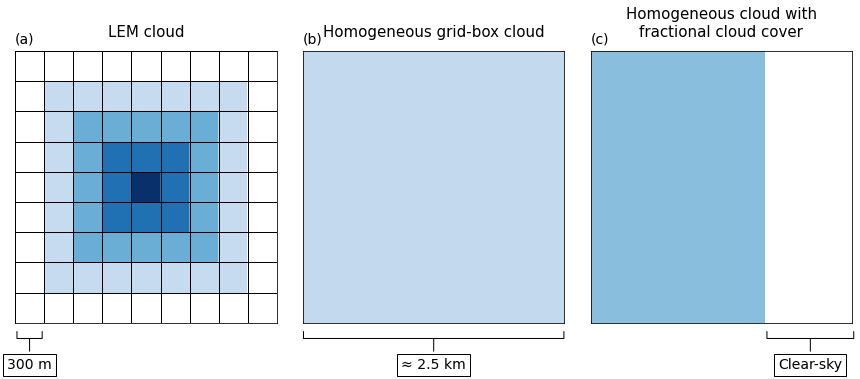

In [12]:
N = 9
# make an empty data set
data = np.zeros((N, N))
# fill in some fake data
for j in range(4)[::-1]:
    data[N//2 - j : N//2 + j +1, N//2 - j : N//2 + j +1] = -(j-4)
# center    
data[4,4] = 4

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
i = 0

for ax in axes.flat:
    if i == 0:
        ax.pcolor(np.arange(10),np.arange(10),data,cmap=Blues_n,vmin=0,vmax=4)
        for x in range(N + 1):
            ax.axhline(x, lw=1, color='k', zorder=5)
            ax.axvline(x, lw=1, color='k', zorder=5)
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.set_title('LEM cloud', fontsize=15,pad=15)
        ax.annotate('300 m', xy=(0.055, -0.05), xytext=(0.055, -0.18), xycoords='axes fraction', 
            fontsize=14, ha='center', va='bottom',
            bbox=dict(boxstyle=None, fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=0.9, lengthB=0.5', lw=1.0))
        
        ax.text(0.0, 1.03, '(a)', transform=ax.transAxes, 
            size=14)
        
    if i == 1:    
        ax.pcolor(np.arange(10),np.arange(10),data*0+data.mean(),cmap=Blues_n,vmin=0,vmax=4)
        #for x in range(N + 1):
        #    ax.axhline(x, lw=1, color='k', zorder=5)
        #    ax.axvline(x, lw=1, color='k', zorder=5)
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.set_title('Homogeneous grid-box cloud', fontsize=15,pad=15)
        ax.annotate('≈ 2.5 km', xy=(0.5, -0.05), xytext=(0.5, -0.18), xycoords='axes fraction', 
            fontsize=14, ha='center', va='bottom',
            bbox=dict(boxstyle=None, fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=9.3, lengthB=0.5', lw=1.0))
        
        ax.text(0.0, 1.03, '(b)', transform=ax.transAxes, 
            size=14)
        
    if i == 2:      
        cloudy = data[np.nonzero(data)]
        clc = cloudy.mean()
        clct = data*0.0
        clct[:,0:6] = clc
        ax.pcolor(np.arange(10),np.arange(10),clct,cmap=Blues_n,vmin=0,vmax=4)
        #for x in range(N + 1):
        #    ax.axhline(x, lw=1, color='k', zorder=5)
        #    ax.axvline(x, lw=1, color='k', zorder=5)
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.set_title('Homogeneous cloud with\nfractional cloud cover', fontsize=15,pad=15)
        ax.annotate('Clear-sky', xy=(0.84, -0.05), xytext=(0.84, -0.18), xycoords='axes fraction', 
            fontsize=14, ha='center', va='bottom',
            bbox=dict(boxstyle=None, fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=3.1, lengthB=0.5', lw=1.0))
        
        ax.text(0.0, 1.03, '(c)', transform=ax.transAxes, 
            size=14)
        
    i = i + 1
fig.subplots_adjust(wspace=0.1)

plt.savefig('figure3.pdf',bbox_inches = 'tight')
plt.savefig('figure3.png', bbox_inches = 'tight',dpi=300)